### General libraries being loaded

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
# %matplotlib widget
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# For plotting statistical figures
import seaborn as sns; sns.set()

# For speeding up numpy operations
import cupy as cp

# For faster numpy computation
from numba import jit, cuda

# For Progress Bar
from tqdm.auto import tqdm,trange
tqdm.pandas()

# Vaex Dataframe library
import vaex as vx

# For Pyspark activation
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

# Pyspark Dataframe
from pyspark import pandas as ps

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Loading Metadata for Analysis

In [2]:
# Meta Data for filtering data (i.e, number of research papers), is being loaded
Cord_Meta_Data = pd.read_csv(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\metadata.csv", dtype = {'sha':'str', 'doi':'str', 'pmcid':'str', 'pubmed_id':'str', 'arxiv_id':'str', 'who_covidence_id':'str', 'pdf_json_files':'str', 'pmc_json_files':'str'})
Cord_Meta_Data = Cord_Meta_Data.astype('object')

In [3]:
print('\033[1m' + 'The Quantity of Data in Meta Dataset is:' + '\033[0m' + '\n')
print(Cord_Meta_Data.count())
print('\n')
Cord_Meta_Data = Cord_Meta_Data.fillna('NA/NAN')

The Quantity of Data in Meta Dataset is:

cord_uid            1056660
sha                  373766
source_x            1056660
title               1056157
doi                  656780
pmcid                389571
pubmed_id            498932
license             1056660
abstract             821118
publish_time        1054846
authors             1032791
journal              969338
mag_id                    0
who_covidence_id     482935
arxiv_id              14249
pdf_json_files       373766
pmc_json_files       315742
url                  686934
s2_id                976468
dtype: int64




In [4]:
print('\033[1m' + 'The Loaded Meta Dataset is:' + '\033[0m' + '\n')
print(Cord_Meta_Data.iloc[0:5])
print('\n')

The Loaded Meta Dataset is:

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   


### Converting Publish Time - str to Publish Time - timestamp

In [5]:
from datetime import datetime

In [6]:
# Function to convert string to timestamp
def row_strptime_datetime(row_str_val):
    for frt in ('%Y-%m-%d', '%Y'):
        try:
            return datetime.strptime(row_str_val, frt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [7]:
# Using apply() to convert string to timestamp
Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] = Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'].progress_apply(row_strptime_datetime)

  0%|          | 0/1054846 [00:00<?, ?it/s]

In [8]:
# Only keeping the year part of the publish time and excluding everything else
Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] = pd.DatetimeIndex(Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time']).year

### Plot of Research Papers from 1825 to 2022 on Covid-19

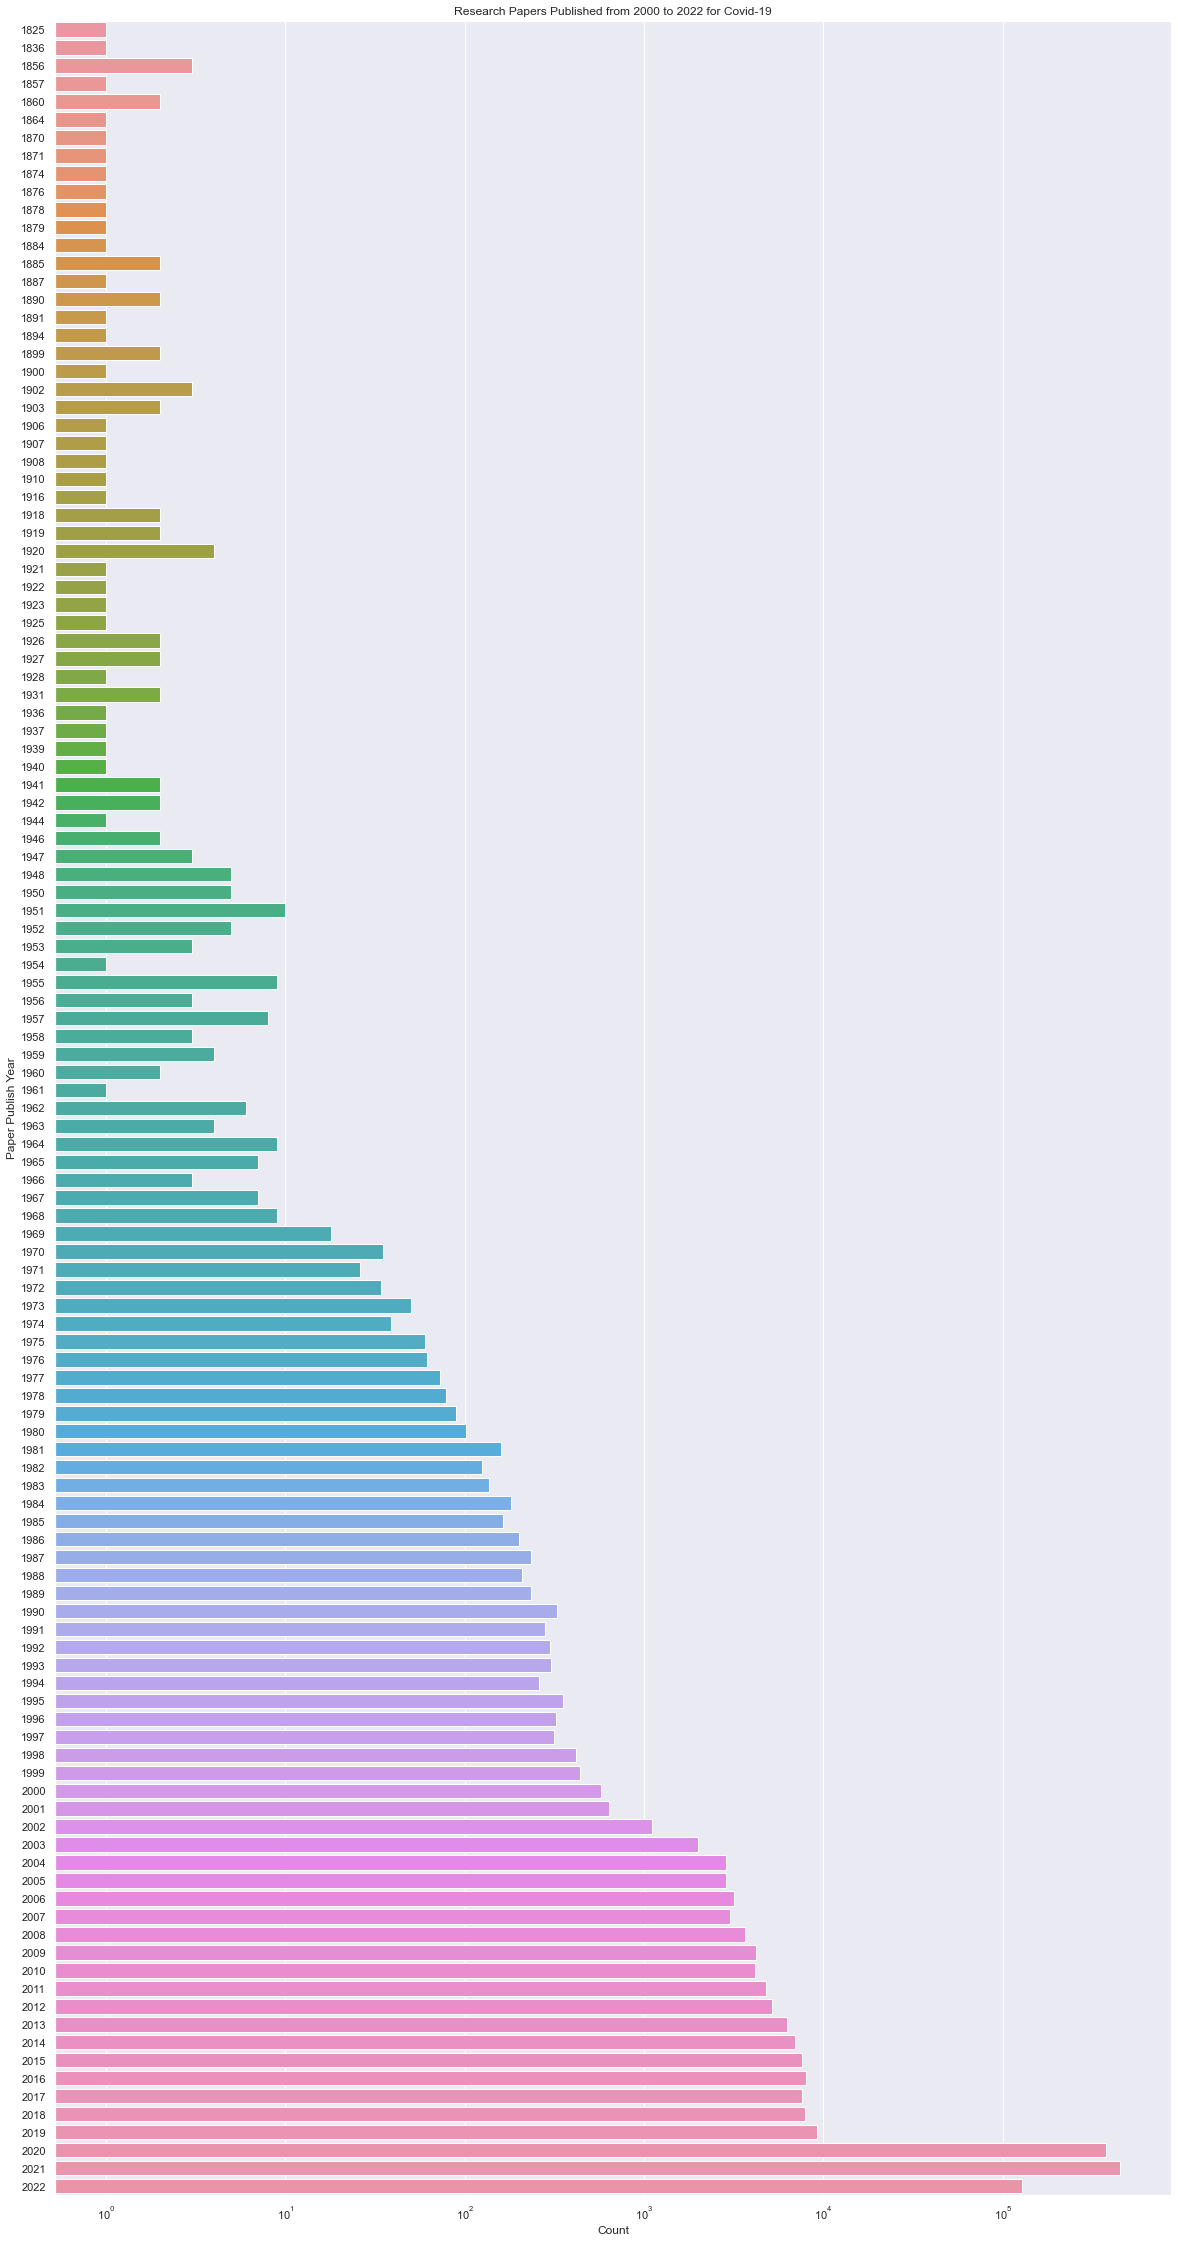

In [9]:
# Plotting Research Papers on Covid-19 from Year 1825 to 2022
sns.set(rc = {'figure.figsize':(20,40)})
Cord_Meta_Data_ax = sns.countplot(y = Cord_Meta_Data.loc[(~(Cord_Meta_Data['publish_time'] == 'NA/NAN'))&(Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] >= 1000)&(Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] <= 2022),'publish_time'],log=True)
Cord_Meta_Data_ax.set(ylabel='Paper Publish Year', xlabel='Count', title='Research Papers Published from 2000 to 2022 for Covid-19')
plt.show()

### Plot of Research Papers from 2019 to 2022 on Covid-19 (Also, keeping data from 2019 to 2022 only, because Covid-19 started in 2019)

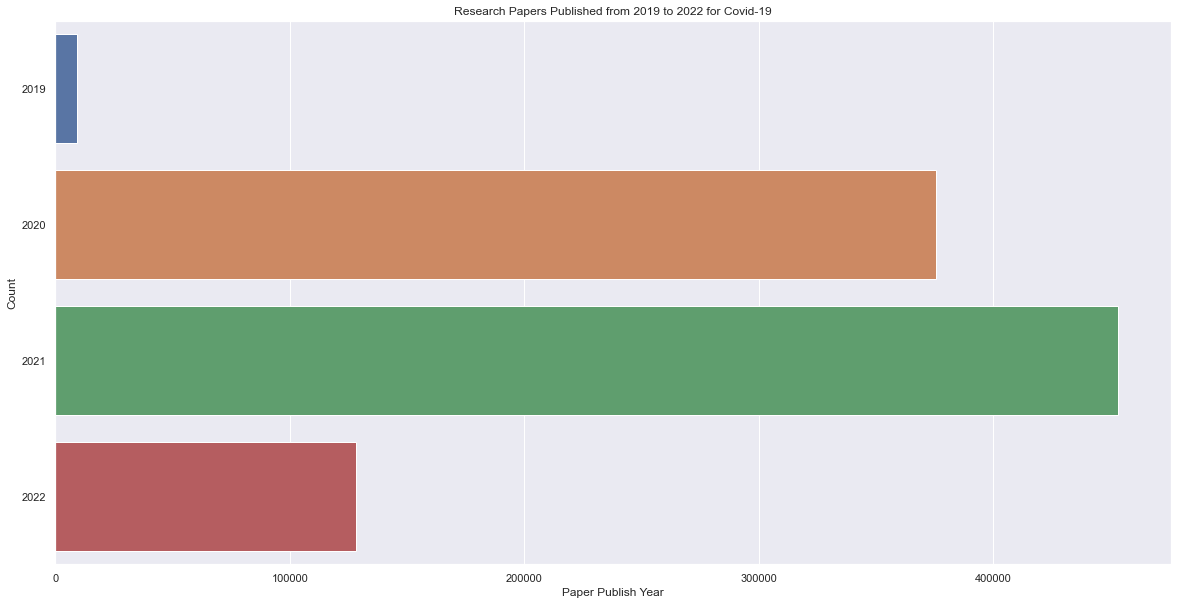

In [10]:
# Plotting Research Papers on Covid-19 from Year 2019 to 2022
sns.set(rc = {'figure.figsize':(20,10)})
Cord_Meta_Data_ax = sns.countplot(y = Cord_Meta_Data.loc[(~(Cord_Meta_Data['publish_time'] == 'NA/NAN'))&(Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] >= 2019)&(Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),'publish_time'] <= 2022),'publish_time'])
Cord_Meta_Data_ax.set(xlabel='Paper Publish Year', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [11]:
# Keeping data from 2019 to 2022 only, because Covid-19 started in 2019
Cord_Meta_Data = Cord_Meta_Data.loc[~(Cord_Meta_Data['publish_time'] == 'NA/NAN'),:].reset_index(drop=True)
Cord_Meta_Data = Cord_Meta_Data.loc[(Cord_Meta_Data['publish_time'] >= 2019) & (Cord_Meta_Data['publish_time'] <= 2022),:].reset_index(drop=True)

### Analysing Research Papers with Title and No Title (Meta Data)

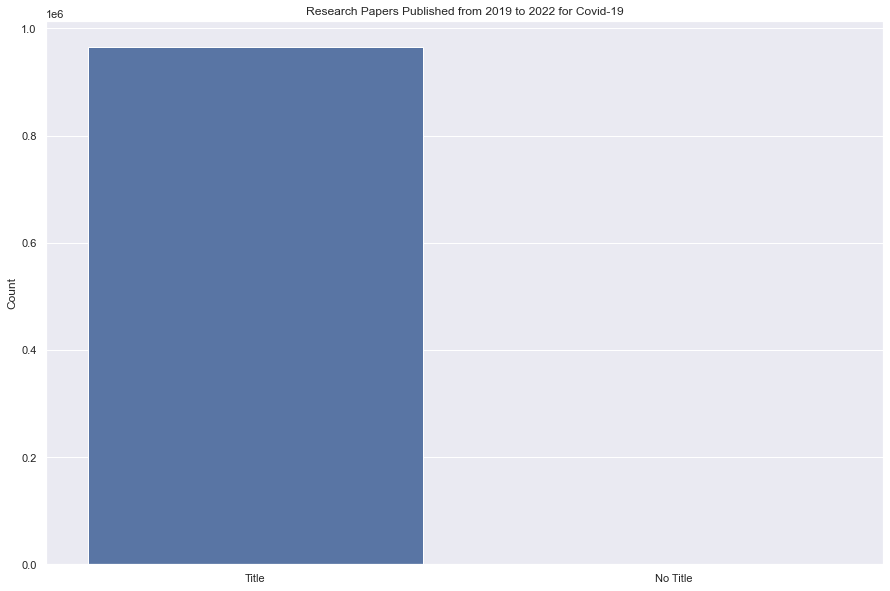

In [12]:
# Plotting Research Papers with Title and No Title
sns.set(rc = {'figure.figsize':(15,10)})
Cord_Meta_Data_ax = sns.barplot(x = ['Title', 'No Title'], y = [Cord_Meta_Data.loc[~(Cord_Meta_Data['title'] == 'NA/NAN'),'title'].shape[0], Cord_Meta_Data.loc[(Cord_Meta_Data['title'] == 'NA/NAN'),'title'].shape[0]])
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [13]:
# Selecting Research Articles with Title
Cord_Meta_Data = Cord_Meta_Data.loc[~(Cord_Meta_Data['title'] == 'NA/NAN'),:].reset_index(drop=True)

### Analysing Research Papers with Abstract and No Abstract (Meta Data)

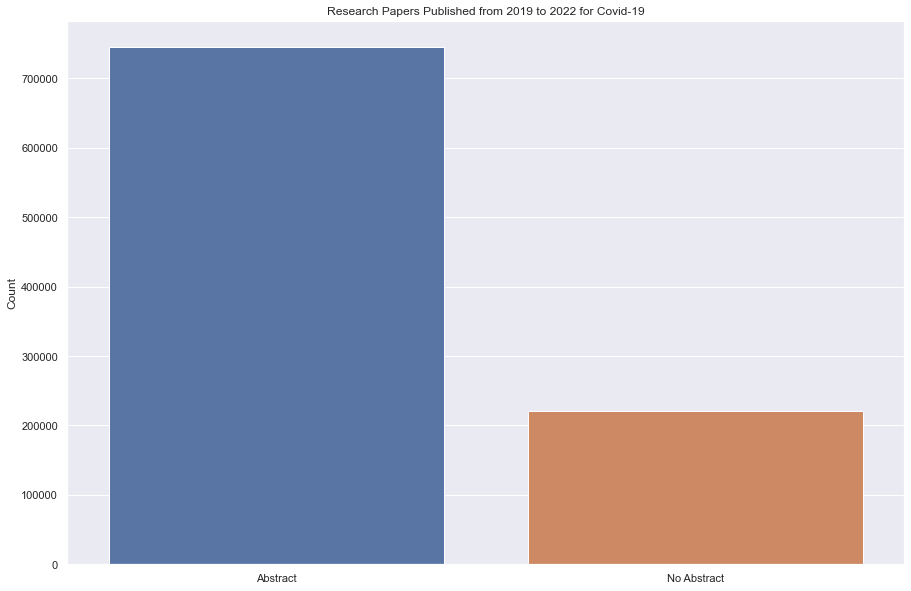

In [14]:
# Plotting Research Papers with Abstract and No Abstract
sns.set(rc = {'figure.figsize':(15,10)})
Cord_Meta_Data_ax = sns.barplot(x = ['Abstract', 'No Abstract'], y = [Cord_Meta_Data.loc[~(Cord_Meta_Data['abstract'] == 'NA/NAN'),'abstract'].shape[0], Cord_Meta_Data.loc[(Cord_Meta_Data['abstract'] == 'NA/NAN'),'abstract'].shape[0]])
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [15]:
# Selecting Research Articles with Abstract
Cord_Meta_Data = Cord_Meta_Data.loc[~(Cord_Meta_Data['abstract'] == 'NA/NAN'),:].reset_index(drop=True)

### Loading Population Target Tables given by Kaggle

In [16]:
import pandas as pd
import glob
import os

Population_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\1_population"
Population_Cord_Target_Path_All_Files = glob.glob(os.path.join(Population_Cord_Target_Path , "*.csv"))

Population_Cord_Target_List = []

for Filename in Population_Cord_Target_Path_All_Files:
    Population_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Population_Cord_Target_List.append(Population_Cord_Target_Df)

In [17]:
Population_Cord_Target_List[5].columns = Population_Cord_Target_List[5].columns.str.replace('Proposed Solution', 'Solution')

### Population Data Filter (Only Selecting Study and Solution)

In [18]:
k=0
for Population_Cord_Target_Sub in Population_Cord_Target_List:
    Population_Cord_Target_List[k] = Population_Cord_Target_Sub.loc[:,['Study','Solution']]
    k=k+1

### Displaying Filtered Population Target Tables given by Kaggle

In [19]:
Population_Cord_Target_Dir = os.listdir(Population_Cord_Target_Path)

k=0
for Population_Cord_Target_Dir_Sub in Population_Cord_Target_Dir:
    Population_Cord_Target_Dir[k] = Population_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [20]:
k=0
for Population_Cord_Target_Dir_Sub in Population_Cord_Target_Dir:
    Population_Cord_Target_List[k]['Query'] = Population_Cord_Target_List[k].shape[0] * [Population_Cord_Target_Dir_Sub]
    k=k+1

In [21]:
Population_Cord_Target = pd.concat(Population_Cord_Target_List, axis=0, ignore_index=True)

In [22]:
del Population_Cord_Target_List

In [23]:
print('\033[1m' + 'The Loaded Full Population Target Table is:' + '\033[0m' + '\n')
print(Population_Cord_Target.head())
print('\n')

The Loaded Full Population Target Table is:

                                               Study  \
0  COVID-19 outbreak at a large homeless shelter ...   
1  Multidisciplinary research priorities for the ...   
2  U.S. county-level characteristics to inform eq...   
3  Epidemiology of COVID-19 among people experien...   
4  The Challenge of Preventing COVID-19 Spread in...   

                                            Solution  \
0  Universal PCR testing, rather than a symptom t...   
1  Multidisciplinary mental health science resear...   
2  Both the federal and state governments will be...   
3  Municipalities with sizable homeless populatio...   
4  Releasing incarceated Individuals and increase...   

                                               Query  
0  Management of patients who are underhoused or ...  
1  Management of patients who are underhoused or ...  
2  Management of patients who are underhoused or ...  
3  Management of patients who are underhoused or ...  
4  Man

### Loading Relevant Factors Target Tables given by Kaggle

In [24]:
import pandas as pd
import glob
import os

Relevant_Factors_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\2_relevant_factors"
Relevant_Factors_Cord_Target_Path_All_Files = glob.glob(os.path.join(Relevant_Factors_Cord_Target_Path , "*.csv"))

Relevant_Factors_Cord_Target_List = []

for Filename in Relevant_Factors_Cord_Target_Path_All_Files:
    Relevant_Factors_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Relevant_Factors_Cord_Target_List.append(Relevant_Factors_Cord_Target_Df)

### Relevant Factors Data Filter (Only Selecting Study and Solution)

In [25]:
k=0
for Relevant_Factors_Cord_Target_Sub in Relevant_Factors_Cord_Target_List:
    Relevant_Factors_Cord_Target_List[k] = Relevant_Factors_Cord_Target_Sub.loc[:,['Study','Excerpt']]
    k=k+1

### Displaying Filtered Relevant Factors Target Tables given by Kaggle

In [26]:
Relevant_Factors_Cord_Target_Dir = os.listdir(Relevant_Factors_Cord_Target_Path)

k=0
for Relevant_Factors_Cord_Target_Dir_Sub in Relevant_Factors_Cord_Target_Dir:
    Relevant_Factors_Cord_Target_Dir[k] = Relevant_Factors_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [27]:
k=0
for Relevant_Factors_Cord_Target_Dir_Sub in Relevant_Factors_Cord_Target_Dir:
    Relevant_Factors_Cord_Target_List[k]['Query'] = Relevant_Factors_Cord_Target_List[k].shape[0] * [Relevant_Factors_Cord_Target_Dir_Sub]
    k=k+1

In [28]:
Relevant_Factors_Cord_Target = pd.concat(Relevant_Factors_Cord_Target_List, axis=0, ignore_index=True)

In [29]:
del Relevant_Factors_Cord_Target_List

In [30]:
print('\033[1m' + 'The Loaded Full Relevant Factors Target Table is:' + '\033[0m' + '\n')
print(Relevant_Factors_Cord_Target.head())
print('\n')

The Loaded Full Relevant Factors Target Table is:

                                               Study  \
0  Optimal policies for control of the novel coro...   
1  A model for COVID-19 with isolation, quarantin...   
2  Modeling and forecasting of the COVID-19 pande...   
3  Impacts of social and economic factors on the ...   
4  A multi-region discrete time mathematical mode...   

                                             Excerpt  \
0  As well, Fig. 3 shows that the number of quara...   
1  Comparing these four scenarios, we shall deduc...   
2  Our study reveals that the strict control meas...   
3  We then compare the transmission rates in diff...   
4  Figure 10 shows that the number of the exposed...   

                                               Query  
0  Effectiveness of a multifactorial strategy to ...  
1  Effectiveness of a multifactorial strategy to ...  
2  Effectiveness of a multifactorial strategy to ...  
3  Effectiveness of a multifactorial strategy to ...  


### Loading Patient Descriptions Target Tables given by Kaggle

In [31]:
import pandas as pd
import glob
import os

Patient_Descriptions_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\3_patient_descriptions"
Patient_Descriptions_Cord_Target_Path_All_Files = glob.glob(os.path.join(Patient_Descriptions_Cord_Target_Path , "*.csv"))

Patient_Descriptions_Cord_Target_List = []

for Filename in Patient_Descriptions_Cord_Target_Path_All_Files:
    Patient_Descriptions_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Patient_Descriptions_Cord_Target_List.append(Patient_Descriptions_Cord_Target_Df)

### Patient Descriptions Data Filter (Only Selecting Study and Solution)

In [32]:
k=0
for Patient_Descriptions_Cord_Target_Sub in Patient_Descriptions_Cord_Target_List:
    Patient_Descriptions_Cord_Target_List[k] = Patient_Descriptions_Cord_Target_Sub.loc[:,['Study','Excerpt']]
    k=k+1

### Displaying Filtered Patient Descriptions Target Tables given by Kaggle

In [33]:
Patient_Descriptions_Cord_Target_Dir = os.listdir(Patient_Descriptions_Cord_Target_Path)

k=0
for Patient_Descriptions_Cord_Target_Dir_Sub in Patient_Descriptions_Cord_Target_Dir:
    Patient_Descriptions_Cord_Target_Dir[k] = Patient_Descriptions_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [34]:
k=0
for Patient_Descriptions_Cord_Target_Dir_Sub in Patient_Descriptions_Cord_Target_Dir:
    Patient_Descriptions_Cord_Target_List[k]['Query'] = Patient_Descriptions_Cord_Target_List[k].shape[0] * [Patient_Descriptions_Cord_Target_Dir_Sub]
    k=k+1

In [35]:
Patient_Descriptions_Cord_Target = pd.concat(Patient_Descriptions_Cord_Target_List, axis=0, ignore_index=True)

In [36]:
del Patient_Descriptions_Cord_Target_List

In [37]:
print('\033[1m' + 'The Loaded Full Patient Descriptions Target Table is:' + '\033[0m' + '\n')
print(Patient_Descriptions_Cord_Target.head())
print('\n')

The Loaded Full Patient Descriptions Target Table is:

                                               Study  \
0  Presymptomatic Transmission of SARS-CoV-2 — Si...   
1  Modes of contact and risk of transmission in C...   
2  Temporal dynamics in viral shedding and transm...   
3  Epidemiological characteristics of 2019 novel ...   
4  Epidemiological parameters of coronavirus dise...   

                                             Excerpt  \
0  Among the 243 cases of COVID-19 reported in Si...   
1  Only 1 (1/305, 0.33%) and 19 (19/576, 3.3%) cl...   
2  The estimated proportion of presymptomatic tra...   
3  Family secondary attack rate for subsequent ca...   
4  In 102 (43.78%) infector-infectee pairs, trans...   

                                               Query  
0  Can the virus be transmitted asymptomatically ...  
1  Can the virus be transmitted asymptomatically ...  
2  Can the virus be transmitted asymptomatically ...  
3  Can the virus be transmitted asymptomatically ..

### Loading Models and Open Questions Target Tables given by Kaggle

In [38]:
import pandas as pd
import glob
import os

Models_and_Open_Questions_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\4_models_and_open_questions"
Models_and_Open_Questions_Cord_Target_Path_All_Files = glob.glob(os.path.join(Models_and_Open_Questions_Cord_Target_Path , "*.csv"))

Models_and_Open_Questions_Cord_Target_List = []

for Filename in Models_and_Open_Questions_Cord_Target_Path_All_Files:
    Models_and_Open_Questions_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Models_and_Open_Questions_Cord_Target_List.append(Models_and_Open_Questions_Cord_Target_Df)

In [39]:
Models_and_Open_Questions_Cord_Target_List[1].columns = Models_and_Open_Questions_Cord_Target_List[1].columns.str.replace('Solution', 'Result')
Models_and_Open_Questions_Cord_Target_List[3].columns = Models_and_Open_Questions_Cord_Target_List[3].columns.str.replace('Excerpt', 'Result')
Models_and_Open_Questions_Cord_Target_List[5].columns = Models_and_Open_Questions_Cord_Target_List[5].columns.str.replace('Excerpt', 'Result')

### Models and Open Questions Data Filter (Only Selecting Study and Solution)

In [40]:
k=0
for Models_and_Open_Questions_Cord_Target_Sub in Models_and_Open_Questions_Cord_Target_List:
    Models_and_Open_Questions_Cord_Target_List[k] = Models_and_Open_Questions_Cord_Target_Sub.loc[:,['Study','Result']]
    k=k+1

### Displaying Filtered Models and Open Questions Target Tables given by Kaggle

In [41]:
Models_and_Open_Questions_Cord_Target_Dir = os.listdir(Models_and_Open_Questions_Cord_Target_Path)

k=0
for Models_and_Open_Questions_Cord_Target_Dir_Sub in Models_and_Open_Questions_Cord_Target_Dir:
    Models_and_Open_Questions_Cord_Target_Dir[k] = Models_and_Open_Questions_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [42]:
k=0
for Models_and_Open_Questions_Cord_Target_Dir_Sub in Models_and_Open_Questions_Cord_Target_Dir:
    Models_and_Open_Questions_Cord_Target_List[k]['Query'] = Models_and_Open_Questions_Cord_Target_List[k].shape[0] * [Models_and_Open_Questions_Cord_Target_Dir_Sub]
    k=k+1

In [43]:
Models_and_Open_Questions_Cord_Target = pd.concat(Models_and_Open_Questions_Cord_Target_List, axis=0, ignore_index=True)

In [44]:
del Models_and_Open_Questions_Cord_Target_List

In [45]:
print('\033[1m' + 'The Loaded Full Models and Open Questions Target Table is:' + '\033[0m' + '\n')
print(Models_and_Open_Questions_Cord_Target.head())
print('\n')

The Loaded Full Models and Open Questions Target Table is:

                                               Study  \
0  Lymphopenic community acquired pneumonia as si...   
1  Critical role of type III interferon in contro...   
2  Distinct early IgA profile may determine sever...   
3  Single-cell analysis of human lung epithelia r...   
4  The phenotypic changes of γδ T cells in COVID-...   

                                              Result  \
0  85% of patients critically ill showed lymphope...   
1  human intestinal epithelial cells fully suppor...   
2  Severe illness correlated with delayed, but br...   
3  ACE2-positive AT2 cells that co-express pathog...   
4  increased expression of CD4 in γδ T cells may ...   

                                        Query  
0  Are there studies about phenotypic change_  
1  Are there studies about phenotypic change_  
2  Are there studies about phenotypic change_  
3  Are there studies about phenotypic change_  
4  Are there studies about

### Loading Materials Target Tables given by Kaggle

In [46]:
import pandas as pd
import glob
import os

Materials_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\5_materials"
Materials_Cord_Target_Path_All_Files = glob.glob(os.path.join(Materials_Cord_Target_Path , "*.csv"))

Materials_Cord_Target_List = []

for Filename in Materials_Cord_Target_Path_All_Files:
    Materials_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Materials_Cord_Target_List.append(Materials_Cord_Target_Df)

### Materials Data Filter (Only Selecting Study and Solution)

In [47]:
k=0
for Materials_Cord_Target_Sub in Materials_Cord_Target_List:
    Materials_Cord_Target_List[k] = Materials_Cord_Target_Sub.loc[:,['Study','Conclusion']]
    k=k+1

### Displaying Filtered Materials Target Tables given by Kaggle

In [48]:
Materials_Cord_Target_Dir = os.listdir(Materials_Cord_Target_Path)

k=0
for Materials_Cord_Target_Dir_Sub in Materials_Cord_Target_Dir:
    Materials_Cord_Target_Dir[k] = Materials_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [49]:
k=0
for Materials_Cord_Target_Dir_Sub in Materials_Cord_Target_Dir:
    Materials_Cord_Target_List[k]['Query'] = Materials_Cord_Target_List[k].shape[0] * [Materials_Cord_Target_Dir_Sub]
    k=k+1

In [50]:
Materials_Cord_Target = pd.concat(Materials_Cord_Target_List, axis=0, ignore_index=True)

In [51]:
del Materials_Cord_Target_List

In [52]:
print('\033[1m' + 'The Loaded Full Materials Target Table is:' + '\033[0m' + '\n')
print(Materials_Cord_Target.head())
print('\n')

The Loaded Full Materials Target Table is:

                                               Study  \
0                                     Review Article   
1                                     Review Article   
2                                     Review Article   
3                                     Review Article   
4  Detection of Air and Surface Contamination by ...   

                                          Conclusion  \
0  Coronavirus can sustain for a long time on var...   
1  Coronavirus can sustain for a long time on var...   
2  Coronavirus can sustain for a long time on var...   
3  Coronavirus can sustain for a long time on var...   
4                                 contaminated (65%)   

                                     Query  
0  Adhesion to hydrophilic_phobic surfaces  
1  Adhesion to hydrophilic_phobic surfaces  
2  Adhesion to hydrophilic_phobic surfaces  
3  Adhesion to hydrophilic_phobic surfaces  
4  Adhesion to hydrophilic_phobic surfaces  




### Loading Diagnostics Target Tables given by Kaggle

In [53]:
import pandas as pd
import glob
import os

Diagnostics_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\6_diagnostics"
Diagnostics_Cord_Target_Path_All_Files = glob.glob(os.path.join(Diagnostics_Cord_Target_Path , "*.csv"))

Diagnostics_Cord_Target_List = []

for Filename in Diagnostics_Cord_Target_Path_All_Files:
    Diagnostics_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Diagnostics_Cord_Target_List.append(Diagnostics_Cord_Target_Df)

### Diagnostics Data Filter (Only Selecting Study and Solution)

In [54]:
k=0
for Diagnostics_Cord_Target_Sub in Diagnostics_Cord_Target_List:
    Diagnostics_Cord_Target_List[k] = Diagnostics_Cord_Target_Sub.loc[:,['Study','Detection Method']]
    k=k+1

### Displaying Filtered Diagnostics Target Tables given by Kaggle

In [55]:
Diagnostics_Cord_Target_Dir = os.listdir(Diagnostics_Cord_Target_Path)

k=0
for Diagnostics_Cord_Target_Dir_Sub in Diagnostics_Cord_Target_Dir:
    Diagnostics_Cord_Target_Dir[k] = Diagnostics_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [56]:
k=0
for Diagnostics_Cord_Target_Dir_Sub in Diagnostics_Cord_Target_Dir:
    Diagnostics_Cord_Target_List[k]['Query'] = Diagnostics_Cord_Target_List[k].shape[0] * [Diagnostics_Cord_Target_Dir_Sub]
    k=k+1

In [57]:
Diagnostics_Cord_Target = pd.concat(Diagnostics_Cord_Target_List, axis=0, ignore_index=True)

In [58]:
del Diagnostics_Cord_Target_List

In [59]:
print('\033[1m' + 'The Loaded Full Models and Open Questions Target Table is:' + '\033[0m' + '\n')
print(Diagnostics_Cord_Target.head())
print('\n')

The Loaded Full Models and Open Questions Target Table is:

                                               Study  \
0  Comparison of Abbott ID Now and Abbott m2000 m...   
1  The Detection of SARS-CoV-2 using the Cepheid ...   
2  RAPID SEROLOGICAL TESTS HAVE A ROLE IN ASYMPTO...   
3  The Detection of SARS-CoV-2 using the Cepheid ...   
4  The Detection of SARS-CoV-2 using the Cepheid ...   

                                    Detection Method  \
0                           Isothermal amplification   
1                       Roche cobas SARS-CoV-2 assay   
2  rapid serological test Viva-Diag analyzingCOVI...   
3              Cepheid Xpert Xpress SARS-CoV-2 assay   
4                                     Roche Platform   

                                               Query  
0  Development of a point-of-care test and rapid ...  
1  Development of a point-of-care test and rapid ...  
2  Development of a point-of-care test and rapid ...  
3  Development of a point-of-care test and rap

### Loading Therapeutics Interventions and Clinical Studies Target Tables given by Kaggle

In [60]:
import pandas as pd
import glob
import os

Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\7_therapeutics_interventions_and_clinical_studies"
Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Path_All_Files = glob.glob(os.path.join(Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Path , "*.csv"))

Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List = []

for Filename in Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Path_All_Files:
    Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List.append(Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Df)

### Therapeutics Interventions and Clinical Studies Data Filter (Only Selecting Study and Solution)

In [61]:
k=0
for Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Sub in Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List:
    Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List[k] = Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Sub.loc[:,['Study','General Outcome/Conclusion Excerpt']]
    k=k+1

### Displaying Filtered Therapeutics Interventions and Clinical Studies Target Tables given by Kaggle

In [62]:
Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir = os.listdir(Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Path)

k=0
for Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir_Sub in Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir:
    Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir[k] = Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [63]:
k=0
for Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir_Sub in Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir:
    Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List[k]['Query'] = Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List[k].shape[0] * [Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_Dir_Sub]
    k=k+1

In [64]:
Therapeutics_Interventions_and_Clinical_Studies_Cord_Target = pd.concat(Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List, axis=0, ignore_index=True)

In [65]:
del Therapeutics_Interventions_and_Clinical_Studies_Cord_Target_List

In [66]:
print('\033[1m' + 'The Loaded Full Therapeutics Interventions and Clinical Studies Target Table is:' + '\033[0m' + '\n')
print(Therapeutics_Interventions_and_Clinical_Studies_Cord_Target.head())
print('\n')

The Loaded Full Therapeutics Interventions and Clinical Studies Target Table is:

                                               Study  \
0  Enhanced platelet inhibition treatment improve...   
1  Nifedipine and Amlodipine Are Associated With ...   
2  Pulmonary intravascular coagulation in COVID-1...   
3  Acute limb ischemia in patients with COVID-19 ...   
4  Proposal of the French Society of Vascular Med...   

                  General Outcome/Conclusion Excerpt  \
0  Treated patients consistently experienced a me...   
1  Patients treated with a CCB were significantly...   
2  LMWH at prophylactic doses should be administe...   
3  Successful revascularization was not significa...   
4  Patients hospitalized with an acute medical co...   

                                               Query  
0  What is the best method to combat the hypercoa...  
1  What is the best method to combat the hypercoa...  
2  What is the best method to combat the hypercoa...  
3  What is the best meth

### Loading Risk Factors Tables given by Kaggle

In [67]:
import pandas as pd
import glob
import os

Risk_Factors_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\8_risk_factors"
Risk_Factors_Cord_Target_Path_All_Files = glob.glob(os.path.join(Risk_Factors_Cord_Target_Path , "*.csv"))

Risk_Factors_Cord_Target_List = []

for Filename in Risk_Factors_Cord_Target_Path_All_Files:
    Risk_Factors_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Risk_Factors_Cord_Target_List.append(Risk_Factors_Cord_Target_Df)

### Risk Factors Data Filter (Only Selecting Study and Solution)

In [68]:
k=0
for Risk_Factors_Cord_Target_Sub in Risk_Factors_Cord_Target_List:
    Risk_Factors_Cord_Target_List[k] = Risk_Factors_Cord_Target_Sub.loc[:,['Study','Study Population']]
    k=k+1

### Displaying Filtered Risk Factors Target Tables given by Kaggle

In [69]:
Risk_Factors_Cord_Target_Dir = os.listdir(Risk_Factors_Cord_Target_Path)

k=0
for Risk_Factors_Cord_Target_Dir_Sub in Risk_Factors_Cord_Target_Dir:
    Risk_Factors_Cord_Target_Dir[k] = Risk_Factors_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [70]:
k=0
for Risk_Factors_Cord_Target_Dir_Sub in Risk_Factors_Cord_Target_Dir:
    Risk_Factors_Cord_Target_List[k]['Query'] = Risk_Factors_Cord_Target_List[k].shape[0] * [Risk_Factors_Cord_Target_Dir_Sub]
    k=k+1

In [71]:
Risk_Factors_Cord_Target = pd.concat(Risk_Factors_Cord_Target_List, axis=0, ignore_index=True)

In [72]:
del Risk_Factors_Cord_Target_List

In [73]:
print('\033[1m' + 'The Loaded Full Risk Factors Target Table is:' + '\033[0m' + '\n')
print(Risk_Factors_Cord_Target.head())
print('\n')

The Loaded Full Risk Factors Target Table is:

                                               Study  \
0  Phenotypic characteristics and prognosis of in...   
1          Obesity and COVID-19: an Italian snapshot   
2  Association between Cardiovascular Burden and ...   
3  Association between Cardiovascular Burden and ...   
4  Association between Cardiovascular Burden and ...   

                                    Study Population Query  
0  The CORONADO study was launched in all French ...   Age  
1  92 patients stayed at least one day in the COV...   Age  
2  February 5, 2020, to March 10, 2020 (followed ...   Age  
3  February 5, 2020, to March 10, 2020 (followed ...   Age  
4  February 5, 2020, to March 10, 2020 (followed ...   Age  




### Loading Key Scientific Questions Target Tables given by Kaggle

In [74]:
import pandas as pd
import glob
import os

Key_Scientific_Questions_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\unsorted_tables\key_scientific_questions"
Key_Scientific_Questions_Cord_Target_Path_All_Files = glob.glob(os.path.join(Key_Scientific_Questions_Cord_Target_Path , "*.csv"))

Key_Scientific_Questions_Cord_Target_List = []

for Filename in Key_Scientific_Questions_Cord_Target_Path_All_Files:
    Key_Scientific_Questions_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Key_Scientific_Questions_Cord_Target_List.append(Key_Scientific_Questions_Cord_Target_Df)

In [75]:
Key_Scientific_Questions_Cord_Dict = {'Conclusion': 'Excerpt', 'Detection Method': 'Excerpt', 'Solution': 'Excerpt', 'Result': 'Excerpt', 'Proposed Solution':'Excerpt', 'General Outcome/Conclusion Excerpt':'Excerpt','Excerpt': 'Excerpt'}

In [76]:
k=0
for Key_Scientific_Questions_Cord_Target_Df in Key_Scientific_Questions_Cord_Target_List:
    Key_Scientific_Questions_Cord_Target_List[k].rename(columns=Key_Scientific_Questions_Cord_Dict,inplace=True) 
    k=k+1

### Key Scientific Questions Data Filter (Only Selecting Study and Solution)

In [77]:
k=0
for Key_Scientific_Questions_Cord_Target_Sub in Key_Scientific_Questions_Cord_Target_List:
    Key_Scientific_Questions_Cord_Target_List[k] = Key_Scientific_Questions_Cord_Target_Sub.loc[:,['Study','Excerpt']]
    k=k+1

### Displaying Filtered Key Scientific Questions Target Tables given by Kaggle

In [78]:
Key_Scientific_Questions_Cord_Target_Dir = os.listdir(Key_Scientific_Questions_Cord_Target_Path)

k=0
for Key_Scientific_Questions_Cord_Target_Dir_Sub in Key_Scientific_Questions_Cord_Target_Dir:
    Key_Scientific_Questions_Cord_Target_Dir[k] = Key_Scientific_Questions_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [79]:
k=0
for Key_Scientific_Questions_Cord_Target_Dir_Sub in Key_Scientific_Questions_Cord_Target_Dir:
    Key_Scientific_Questions_Cord_Target_List[k]['Query'] = Key_Scientific_Questions_Cord_Target_List[k].shape[0] * [Key_Scientific_Questions_Cord_Target_Dir_Sub]
    k=k+1

In [80]:
Key_Scientific_Questions_Cord_Target = pd.concat(Key_Scientific_Questions_Cord_Target_List, axis=0, ignore_index=True)

In [81]:
del Key_Scientific_Questions_Cord_Target_List

In [82]:
print('\033[1m' + 'The Loaded Full Key Scientific Questions Target Table is:' + '\033[0m' + '\n')
print(Key_Scientific_Questions_Cord_Target.head())
print('\n')

The Loaded Full Key Scientific Questions Target Table is:

                                               Study  \
0                                     Review Article   
1                                     Review Article   
2                                     Review Article   
3                                     Review Article   
4  Detection of Air and Surface Contamination by ...   

                                             Excerpt  \
0  Coronavirus can sustain for a long time on var...   
1  Coronavirus can sustain for a long time on var...   
2  Coronavirus can sustain for a long time on var...   
3  Coronavirus can sustain for a long time on var...   
4                                 contaminated (65%)   

                                     Query  
0  Adhesion to hydrophilic_phobic surfaces  
1  Adhesion to hydrophilic_phobic surfaces  
2  Adhesion to hydrophilic_phobic surfaces  
3  Adhesion to hydrophilic_phobic surfaces  
4  Adhesion to hydrophilic_phobic surfaces

### Loading Risk Factors 1 Target Tables given by Kaggle

In [83]:
import pandas as pd
import glob
import os

Risk_Factors_1_Cord_Target_Path = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\Kaggle\target_tables\unsorted_tables\risk_factors"
Risk_Factors_1_Cord_Target_Path_All_Files = glob.glob(os.path.join(Risk_Factors_1_Cord_Target_Path , "*.csv"))

Risk_Factors_1_Cord_Target_List = []

for Filename in Risk_Factors_1_Cord_Target_Path_All_Files:
    Risk_Factors_1_Cord_Target_Df = pd.read_csv(Filename, index_col=None, header=0)
    Risk_Factors_1_Cord_Target_List.append(Risk_Factors_1_Cord_Target_Df)

### Risk Factors 1 Data Filter (Only Selecting Study and Solution)

In [84]:
k=0
for Risk_Factors_1_Cord_Target_Sub in Risk_Factors_1_Cord_Target_List:
    Risk_Factors_1_Cord_Target_List[k] = Risk_Factors_1_Cord_Target_Sub.loc[:,['Study','Study Population']]
    k=k+1

### Displaying Filtered Risk Factors 1 Target Tables given by Kaggle

In [85]:
Risk_Factors_1_Cord_Target_Dir = os.listdir(Risk_Factors_1_Cord_Target_Path)

k=0
for Risk_Factors_1_Cord_Target_Dir_Sub in Risk_Factors_1_Cord_Target_Dir:
    Risk_Factors_1_Cord_Target_Dir[k] = Risk_Factors_1_Cord_Target_Dir_Sub[:-4]
    k=k+1

In [86]:
k=0
for Risk_Factors_1_Cord_Target_Dir_Sub in Risk_Factors_1_Cord_Target_Dir:
    Risk_Factors_1_Cord_Target_List[k]['Query'] = Risk_Factors_1_Cord_Target_List[k].shape[0] * [Risk_Factors_1_Cord_Target_Dir_Sub]
    k=k+1

In [87]:
Risk_Factors_1_Cord_Target = pd.concat(Risk_Factors_1_Cord_Target_List, axis=0, ignore_index=True)

In [88]:
del Risk_Factors_1_Cord_Target_List

In [89]:
print('\033[1m' + 'The Loaded Full Key Scientific Questions Target Table is:' + '\033[0m' + '\n')
print(Risk_Factors_1_Cord_Target.head())
print('\n')

The Loaded Full Key Scientific Questions Target Table is:

                                               Study  \
0  Phenotypic characteristics and prognosis of in...   
1          Obesity and COVID-19: an Italian snapshot   
2  Association between Cardiovascular Burden and ...   
3  Association between Cardiovascular Burden and ...   
4  Association between Cardiovascular Burden and ...   

                                    Study Population Query  
0  The CORONADO study was launched in all French ...   Age  
1  92 patients stayed at least one day in the COV...   Age  
2  February 5, 2020, to March 10, 2020 (followed ...   Age  
3  February 5, 2020, to March 10, 2020 (followed ...   Age  
4  February 5, 2020, to March 10, 2020 (followed ...   Age  




### Joining all DataFrames for Detecting Unique Documents in Target Tables

In [90]:
Population_Cord_Target['Type'] = Population_Cord_Target.shape[0] * ['Population']
Relevant_Factors_Cord_Target['Type'] = Relevant_Factors_Cord_Target.shape[0] * ['Relevant Factors']
Patient_Descriptions_Cord_Target['Type'] = Patient_Descriptions_Cord_Target.shape[0] * ['Patient Descriptions']
Models_and_Open_Questions_Cord_Target['Type'] = Models_and_Open_Questions_Cord_Target.shape[0] * ['Models and Open Questions']
Materials_Cord_Target['Type'] = Materials_Cord_Target.shape[0] * ['Materials']
Diagnostics_Cord_Target['Type'] = Diagnostics_Cord_Target.shape[0] * ['Diagnostics']
Therapeutics_Interventions_and_Clinical_Studies_Cord_Target['Type'] = Therapeutics_Interventions_and_Clinical_Studies_Cord_Target.shape[0] * ['Therapeutics Interventions and Clinical Studies']
Risk_Factors_Cord_Target['Type'] = Risk_Factors_Cord_Target.shape[0] * ['Risk Factors']
Key_Scientific_Questions_Cord_Target['Type'] = Key_Scientific_Questions_Cord_Target.shape[0] * ['Key Scientific Questions']
Risk_Factors_1_Cord_Target['Type'] = Risk_Factors_1_Cord_Target.shape[0] * ['Risk Factors 1']

In [91]:
Population_Cord_Target.columns = Population_Cord_Target.columns.str.replace('Solution', 'Relevant Sentence')
Relevant_Factors_Cord_Target.columns = Relevant_Factors_Cord_Target.columns.str.replace('Excerpt', 'Relevant Sentence')
Patient_Descriptions_Cord_Target.columns = Patient_Descriptions_Cord_Target.columns.str.replace('Excerpt', 'Relevant Sentence')
Models_and_Open_Questions_Cord_Target.columns = Models_and_Open_Questions_Cord_Target.columns.str.replace('Result', 'Relevant Sentence')
Materials_Cord_Target.columns = Materials_Cord_Target.columns.str.replace('Conclusion', 'Relevant Sentence')
Diagnostics_Cord_Target.columns = Diagnostics_Cord_Target.columns.str.replace('Detection Method', 'Relevant Sentence')
Therapeutics_Interventions_and_Clinical_Studies_Cord_Target.columns = Therapeutics_Interventions_and_Clinical_Studies_Cord_Target.columns.str.replace('General Outcome/Conclusion Excerpt', 'Relevant Sentence')
Risk_Factors_Cord_Target.columns = Risk_Factors_Cord_Target.columns.str.replace('Study Population', 'Relevant Sentence')
Key_Scientific_Questions_Cord_Target.columns = Key_Scientific_Questions_Cord_Target.columns.str.replace('Excerpt', 'Relevant Sentence')
Risk_Factors_1_Cord_Target.columns = Risk_Factors_1_Cord_Target.columns.str.replace('Study Population', 'Relevant Sentence')

In [92]:
Total_Cord_Target = pd.concat([Population_Cord_Target, Relevant_Factors_Cord_Target, Patient_Descriptions_Cord_Target, Models_and_Open_Questions_Cord_Target, Materials_Cord_Target, Diagnostics_Cord_Target, Therapeutics_Interventions_and_Clinical_Studies_Cord_Target, Risk_Factors_Cord_Target, Key_Scientific_Questions_Cord_Target, Risk_Factors_1_Cord_Target], ignore_index=True)

In [93]:
Unique_Total_Cord_Target = pd.unique(Total_Cord_Target['Study'])

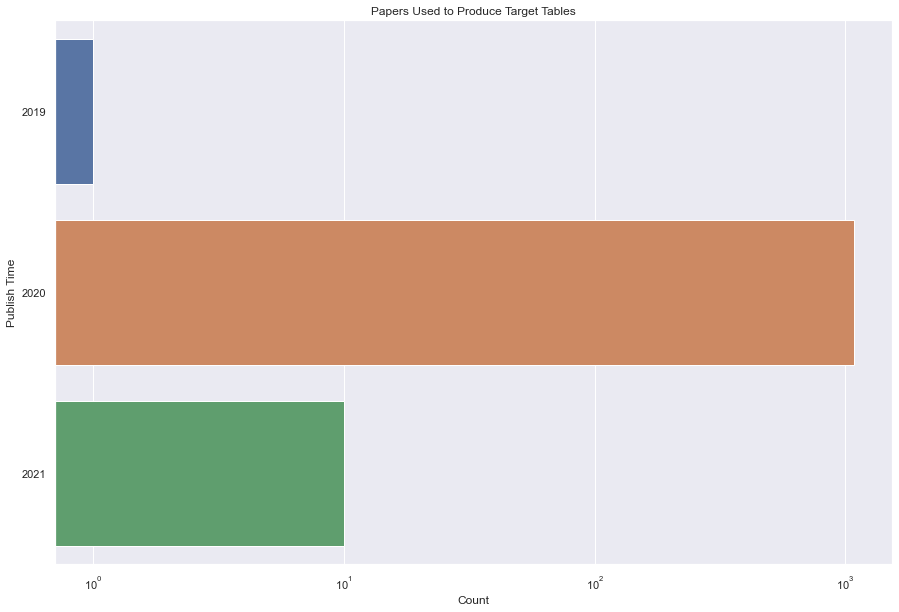

In [94]:
Cord_Uni_Data_ax = sns.countplot(y=Cord_Meta_Data.loc[Cord_Meta_Data['title'].isin(Unique_Total_Cord_Target),'publish_time'],log=True)
Cord_Uni_Data_ax.set(ylabel='Publish Time',xlabel='Count',title='Papers Used to Produce Target Tables')
plt.show()

### Analysing Research Articles with PDF Parse Files (Meta Data)

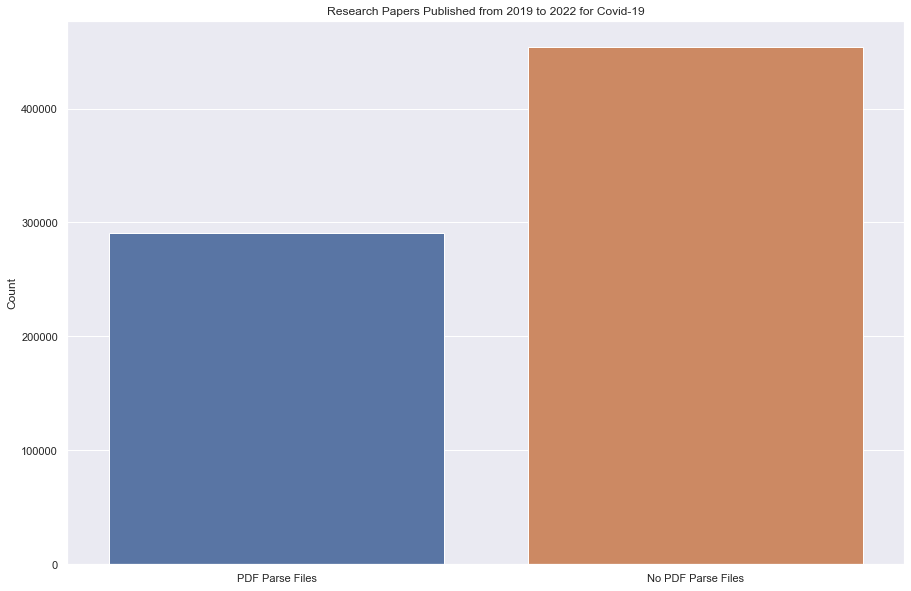

In [95]:
# Plotting Research Papers with PDF Parse Files and No PDF Parse Files
sns.set(rc = {'figure.figsize':(15,10)})
Cord_Meta_Data_ax = sns.barplot(x = ['PDF Parse Files', 'No PDF Parse Files'], y = [Cord_Meta_Data.loc[~(Cord_Meta_Data['pdf_json_files'] == 'NA/NAN'),'pdf_json_files'].shape[0], Cord_Meta_Data.loc[(Cord_Meta_Data['pdf_json_files'] == 'NA/NAN'),'pdf_json_files'].shape[0]])
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [96]:
# Selecting Research Articles with PDF Parse Files
Cord_Meta_Data = Cord_Meta_Data.loc[~(Cord_Meta_Data['pdf_json_files'] == 'NA/NAN'),:].reset_index(drop=True)

### Analysing Research Articles with PDF Parse Files and only Single Document Parse (Meta Data)

In [97]:
def row_semi_colin_path(row_path_value):
    return (';' in row_path_value)

In [98]:
Cord_Meta_Data['pdf_json_files_multi_path'] = Cord_Meta_Data['pdf_json_files'].progress_apply(row_semi_colin_path)

  0%|          | 0/291106 [00:00<?, ?it/s]

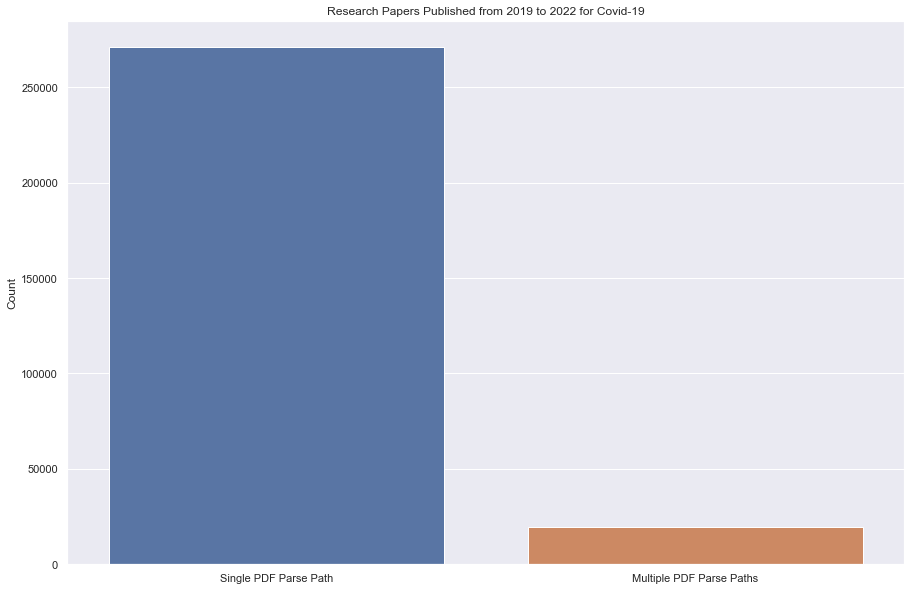

In [99]:
# Plotting Research Papers with PDF Parse Files and No PDF Parse Files
sns.set(rc = {'figure.figsize':(15,10)})
Cord_Meta_Data_ax = sns.barplot(x = ['Single PDF Parse Path', 'Multiple PDF Parse Paths'], y = [Cord_Meta_Data.loc[(Cord_Meta_Data['pdf_json_files_multi_path'] == False),'pdf_json_files'].shape[0], Cord_Meta_Data.loc[(Cord_Meta_Data['pdf_json_files_multi_path'] == True),'pdf_json_files'].shape[0]])
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [100]:
# Selecting Research Articles with PDF Parse Files
Cord_Meta_Data = Cord_Meta_Data.loc[(Cord_Meta_Data['pdf_json_files_multi_path'] == False),:].reset_index(drop=True)

### Loading Json Files of Documents Filtered Above

In [101]:
import json
Article_Data_Cord_File_DF = pd.DataFrame()
Cord_File_Abstract_List = []
Cord_File_Body_Text_List = []
Cord_File_Paper_Id_List = []
Cord_File_Doc_Id_Meta_List = []
Cord_File_Abstract_Meta_List = []
Cord_File_Title_Meta_List = []
Cord_File_Path_Home = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive"
k=0

for Cord_File_Path in Cord_Meta_Data['pdf_json_files'].to_list():
    Cord_File_Path_Tot = Cord_File_Path_Home+f"/{Cord_File_Path}".replace('/', '\\')
    with open(Cord_File_Path_Tot) as Cord_File_Bin:
        Cord_File_Content = json.load(Cord_File_Bin)
        Cord_File_Paper_Id = Cord_File_Content['paper_id']
        Cord_File_Abstract = []
        Cord_File_Body_Text = []
        # Reading Abstract
        for Cord_File_Entry in Cord_File_Content['abstract']:
            Cord_File_Abstract.append(Cord_File_Entry['text'])
        # Reading Body text
        for Cord_File_Entry in Cord_File_Content['body_text']:
            Cord_File_Body_Text.append(Cord_File_Entry['text'])
        Cord_File_Abstract = '\n'.join(Cord_File_Abstract)
        Cord_File_Body_Text = '\n'.join(Cord_File_Body_Text)
    Cord_File_Abstract_List.append(Cord_File_Abstract)
    Cord_File_Body_Text_List.append(Cord_File_Body_Text)
    Cord_File_Paper_Id_List.append(Cord_File_Paper_Id)
    Cord_File_Doc_Id_Meta_List.append(Cord_Meta_Data.loc[k]['cord_uid'])
    Cord_File_Abstract_Meta_List.append(Cord_Meta_Data.loc[k]['abstract'])
    Cord_File_Title_Meta_List.append(Cord_Meta_Data.loc[k]['title'])
    k=k+1

In [102]:
Article_Data_Cord_File_DF['Paper_Id_Parse'] = Cord_File_Paper_Id_List
Article_Data_Cord_File_DF['Abstract_Parse'] = Cord_File_Abstract_List
Article_Data_Cord_File_DF['Body_Text_Parse'] = Cord_File_Body_Text_List
Article_Data_Cord_File_DF['Doc_Id_Meta_Parse'] = Cord_File_Doc_Id_Meta_List
Article_Data_Cord_File_DF['Title_Meta_Parse'] = Cord_File_Title_Meta_List
Article_Data_Cord_File_DF['Abstract_Meta_Parse'] = Cord_File_Abstract_Meta_List

### Analysing Research Articles with Abstract (Extracted Data)

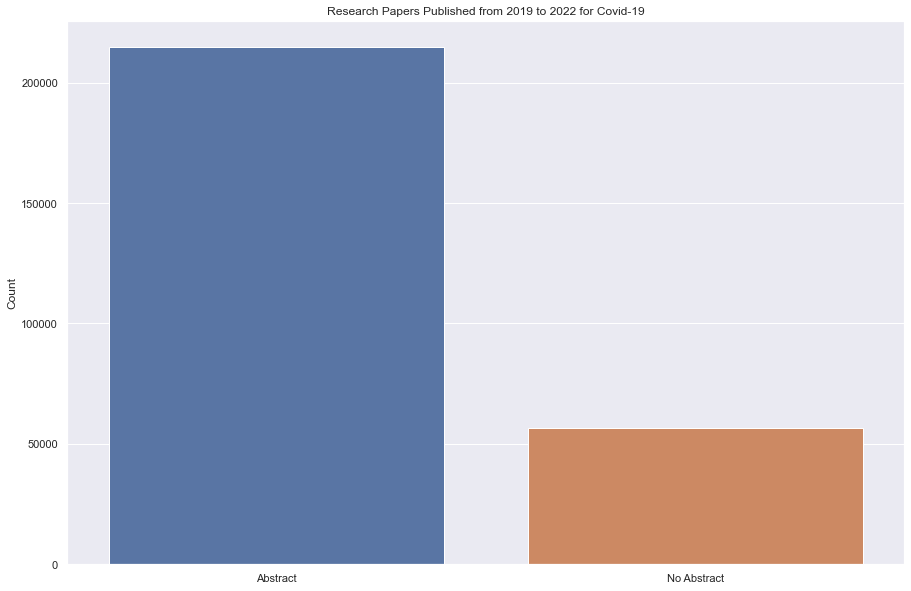

In [103]:
# Plotting Research Papers with PDF Parse Files and No PDF Parse Files
sns.set(rc = {'figure.figsize':(15,10)})
Cord_Meta_Data_ax = sns.barplot(x = ['Abstract', 'No Abstract'], y = [Article_Data_Cord_File_DF.loc[~(Article_Data_Cord_File_DF['Abstract_Parse'] == ''),'Abstract_Parse'].shape[0], Article_Data_Cord_File_DF.loc[(Article_Data_Cord_File_DF['Abstract_Parse'] == ''),'Abstract_Parse'].shape[0]])
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show() 

In [104]:
# Selecting Research Articles with Abstract
Cord_Meta_Data = Cord_Meta_Data.loc[~(Article_Data_Cord_File_DF['Abstract_Parse'] == ''),:].reset_index(drop=True)

In [105]:
# Selecting Research Articles with Abstract
Article_Data_Cord_File_DF = Article_Data_Cord_File_DF.loc[~(Article_Data_Cord_File_DF['Abstract_Parse'] == ''),:].reset_index(drop=True)

### Loading Cord Word Embeddings (Document Embeddings)

In [106]:
Cord_Docu_Embeddings_Df = pd.read_csv(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\cord_19_embeddings_2022-06-02.csv", header=None)

### Filtering Cord-19 Document Embeddings According to Meta Data

In [107]:
Cord_Docu_Embeddings_Df = Cord_Docu_Embeddings_Df.loc[Cord_Docu_Embeddings_Df[0].isin(Cord_Meta_Data['cord_uid'].to_list()),:]
Cord_Docu_Embeddings_Df.reset_index(drop=True,inplace=True)

### Storing Filtered Embedding to CSV

In [108]:
Cord_Docu_Embeddings_Df.to_csv(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\cord_19_embeddings_filtered.csv", header=False, index=False, sep=' ')

In [109]:
del Cord_Docu_Embeddings_Df

In [110]:
import gc
gc.collect()
print("",end="")

### Breaking Abstract and Body Text into Sentences (Using NLTK)

In [111]:
import spacy

# spacy.prefer_gpu()
spacy.require_gpu()
nlp = spacy.load("en_core_web_trf")

In [112]:
import nltk
import nltk.data
nltk.download('all',quiet=True)
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [113]:
def row_para_to_sent(row_para):
    row_sent = sent_detector.tokenize(row_para.strip())
    return row_sent

In [114]:
Article_Data_Cord_File_DF['Abstract_Parse_Sent'] = Article_Data_Cord_File_DF.shape[0] * [0]
Article_Data_Cord_File_DF['Body_Text_Parse_Sent'] = Article_Data_Cord_File_DF.shape[0] * [0]

Article_Data_Cord_File_DF = Article_Data_Cord_File_DF.astype('object')

Article_Data_Cord_File_DF['Abstract_Parse_Sent'] = Article_Data_Cord_File_DF['Abstract_Parse'].progress_apply(row_para_to_sent)
Article_Data_Cord_File_DF['Body_Text_Parse_Sent'] = Article_Data_Cord_File_DF['Body_Text_Parse'].progress_apply(row_para_to_sent)

  0%|          | 0/214995 [00:00<?, ?it/s]

  0%|          | 0/214995 [00:00<?, ?it/s]

### Breaking the Sentences into Token (Using Torchtext) (Preparing Data)

In [115]:
import torchtext
from torchtext.data import get_tokenizer

from tqdm.notebook import trange, tqdm

import torch
tokenizer = get_tokenizer('spacy', language='en_core_web_trf')

In [116]:
Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Abstract'] = Article_Data_Cord_File_DF.shape[0] * [0]
Article_Data_Cord_File_DF = Article_Data_Cord_File_DF.astype('object')

Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Body_Text'] = Article_Data_Cord_File_DF.shape[0] * [0]
Article_Data_Cord_File_DF = Article_Data_Cord_File_DF.astype('object')

In [117]:
Article_Data_Cord_File_DF['Abstract_Parse_Sent_Len'] = Article_Data_Cord_File_DF['Abstract_Parse_Sent'].progress_apply(len)
Article_Data_Cord_File_DF['Body_Text_Parse_Sent_Len'] = Article_Data_Cord_File_DF['Body_Text_Parse_Sent'].progress_apply(len)

  0%|          | 0/214995 [00:00<?, ?it/s]

  0%|          | 0/214995 [00:00<?, ?it/s]

In [118]:
def row_abstract_doc_id_list(row_abstract_doc_id, row_abstract_sent_len):
    row_abstract_doc_id_list = row_abstract_sent_len * [row_abstract_doc_id]
    return row_abstract_doc_id_list

In [119]:
Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Abstract'] = Article_Data_Cord_File_DF.progress_apply(lambda x: row_abstract_doc_id_list(x.Doc_Id_Meta_Parse, x.Abstract_Parse_Sent_Len), axis=1)

  0%|          | 0/214995 [00:00<?, ?it/s]

In [120]:
def row_body_text_doc_id_list(row_body_text_doc_id, row_body_text_sent_len):
    row_body_text_doc_id_list = row_body_text_sent_len * [row_body_text_doc_id]
    return row_body_text_doc_id_list

In [121]:
Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Body_Text'] = Article_Data_Cord_File_DF.progress_apply(lambda x: row_body_text_doc_id_list(x.Doc_Id_Meta_Parse, x.Body_Text_Parse_Sent_Len), axis=1)

  0%|          | 0/214995 [00:00<?, ?it/s]

In [122]:
import itertools

Article_Data_Cord_File_List_Abstract_Id = list(itertools.chain(*(Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Abstract'].to_list())))
Article_Data_Cord_File_List_Abstract = list(itertools.chain(*(Article_Data_Cord_File_DF['Abstract_Parse_Sent'].to_list())))

In [123]:
Article_Data_Cord_File_List_Body_Text_Id = list(itertools.chain(*(Article_Data_Cord_File_DF['Doc_Id_Meta_Parse_Body_Text'].to_list())))
Article_Data_Cord_File_List_Body_Text = list(itertools.chain(*(Article_Data_Cord_File_DF['Body_Text_Parse_Sent'].to_list())))

In [124]:
Article_Data_Cord_File_DF_Abstract_Len = np.sum(Article_Data_Cord_File_DF['Abstract_Parse_Sent'].apply(len).values)

In [125]:
Article_Data_Cord_File_DF_Abstract = pd.DataFrame()
Article_Data_Cord_File_DF_Abstract['Doc_Id_Meta_Parse'] = Article_Data_Cord_File_DF_Abstract_Len * [0]
Article_Data_Cord_File_DF_Abstract['Abstract_Sentences'] = Article_Data_Cord_File_DF_Abstract_Len * [0]
Article_Data_Cord_File_DF_Abstract = Article_Data_Cord_File_DF_Abstract.astype('object')

In [126]:
Article_Data_Cord_File_DF_Abstract['Doc_Id_Meta_Parse'] = Article_Data_Cord_File_List_Abstract_Id
Article_Data_Cord_File_DF_Abstract['Abstract_Sentences'] = Article_Data_Cord_File_List_Abstract

In [127]:
del Article_Data_Cord_File_List_Abstract_Id
del Article_Data_Cord_File_List_Abstract

In [128]:
Article_Data_Cord_File_DF_Body_Text_Len = np.sum(Article_Data_Cord_File_DF['Body_Text_Parse_Sent'].apply(len).values)

In [129]:
Article_Data_Cord_File_DF_Body_Text = pd.DataFrame()
Article_Data_Cord_File_DF_Body_Text['Doc_Id_Meta_Parse'] = Article_Data_Cord_File_DF_Body_Text_Len * [0]
Article_Data_Cord_File_DF_Body_Text['Body_Text_Sentences'] = Article_Data_Cord_File_DF_Body_Text_Len * [0]
Article_Data_Cord_File_DF_Body_Text = Article_Data_Cord_File_DF_Body_Text.astype('object')

In [130]:
Article_Data_Cord_File_DF_Body_Text['Doc_Id_Meta_Parse'] = Article_Data_Cord_File_List_Body_Text_Id
Article_Data_Cord_File_DF_Body_Text['Body_Text_Sentences'] = Article_Data_Cord_File_List_Body_Text

In [131]:
del Article_Data_Cord_File_List_Body_Text_Id
del Article_Data_Cord_File_List_Body_Text

### Storing CORD-19 Meta Data, Article Data Cord DataFrame and Total Target Table

In [132]:
Cord_Meta_Data.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\cord_19_meta_data.pkl")

In [133]:
del Cord_Meta_Data

In [134]:
import gc
gc.collect()
print('',end='')

In [135]:
Article_Data_Cord_File_DF.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\article_data_cord_19_file_df.pkl")

In [136]:
del Article_Data_Cord_File_DF

In [137]:
import gc
gc.collect()
print('',end='')

In [138]:
Total_Cord_Target.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\total_cord_19_target.pkl")

In [139]:
del Total_Cord_Target

In [140]:
import gc
gc.collect()
print('',end='')

### Displaying the Abstract with less than 110 Characters and more than 100 Characters

In [141]:
Article_Data_Cord_File_DF_Abstract_Length = pd.DataFrame()
Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] = Article_Data_Cord_File_DF_Abstract['Abstract_Sentences'].apply(len)

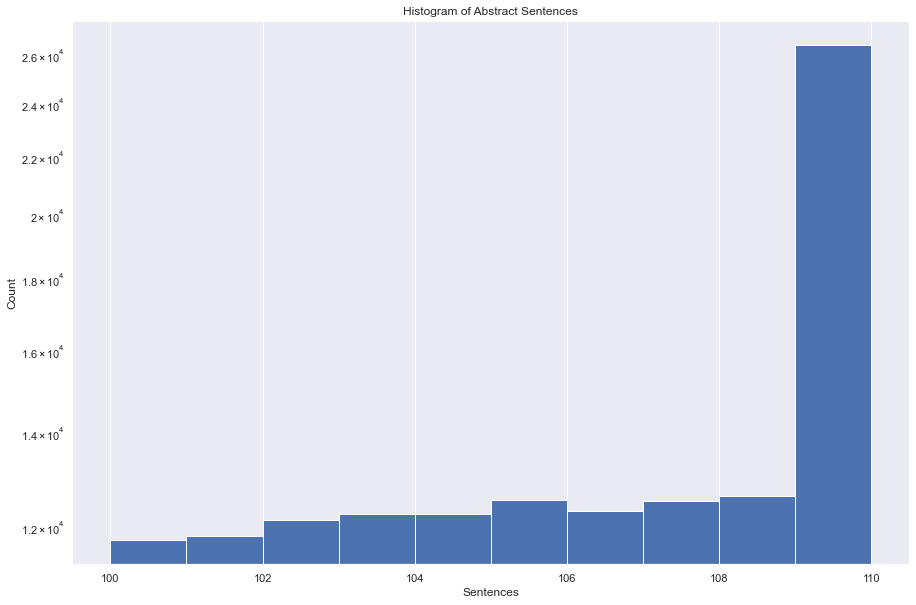

In [142]:
# Histogram plot to determine the optimal character length of sentences
sns.set(rc = {'figure.figsize':(15,10)})

Article_Data_Cord_File_DF_Abstract_Length.hist(column='Abstract_Sentences_Length',log=True,bins=10,range=(100,110))
plt.xlabel('Sentences')
plt.ylabel('Count')
plt.title('Histogram of Abstract Sentences')
plt.show()

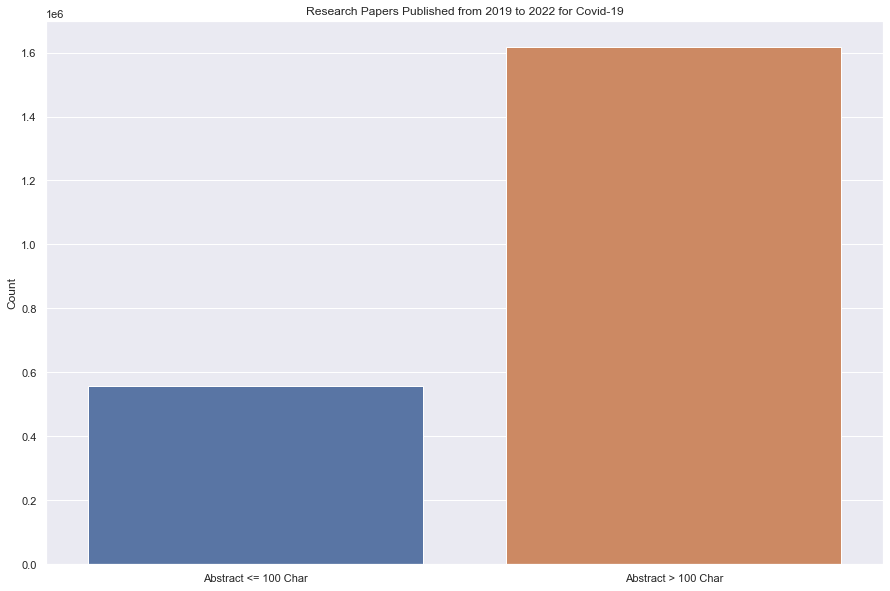

In [143]:
# Plotting Research Papers with Abstract Characters less than 100 and greater than 100
sns.set(rc = {'figure.figsize':(15,10)})

Cord_Meta_Data_ax = sns.barplot(x = ['Abstract <= 100 Char', 'Abstract > 100 Char'], y = [Article_Data_Cord_File_DF_Abstract_Length.loc[Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] <= 100,'Abstract_Sentences_Length'].shape[0], Article_Data_Cord_File_DF_Abstract_Length.loc[Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] > 100,'Abstract_Sentences_Length'].shape[0]],log=False)
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

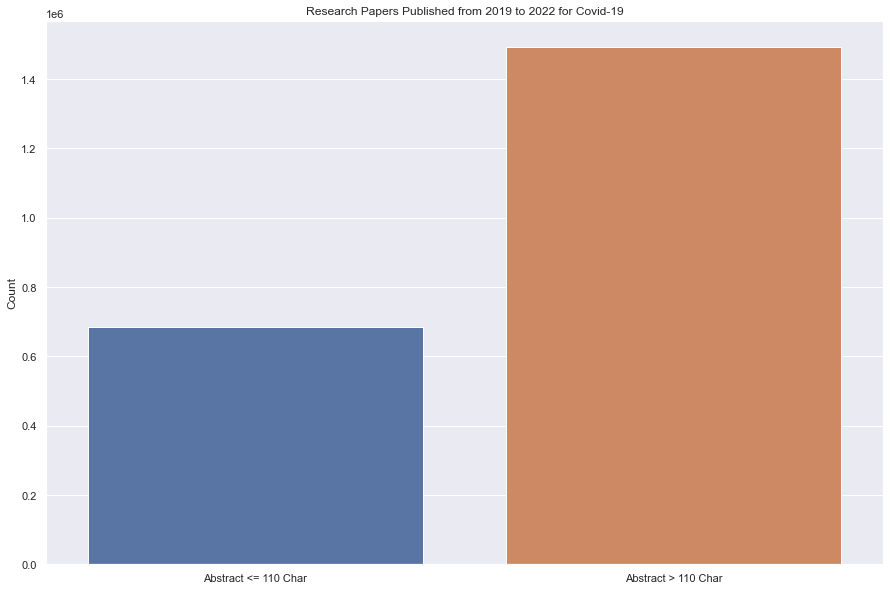

In [144]:
# Plotting Research Papers with Abstract Characters less than 110 and greater than 110
sns.set(rc = {'figure.figsize':(15,10)})

Cord_Meta_Data_ax = sns.barplot(x = ['Abstract <= 110 Char', 'Abstract > 110 Char'], y = [Article_Data_Cord_File_DF_Abstract_Length.loc[Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] <= 110,'Abstract_Sentences_Length'].shape[0], Article_Data_Cord_File_DF_Abstract_Length.loc[Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] > 110,'Abstract_Sentences_Length'].shape[0]],log=False)
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [145]:
# Keeping Abstract sentences with characters between 100 and 110
Article_Data_Cord_File_DF_Abstract = Article_Data_Cord_File_DF_Abstract.loc[(Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] > 100)&(Article_Data_Cord_File_DF_Abstract_Length['Abstract_Sentences_Length'] <= 110),:].reset_index(drop=True)

### Displaying the Body Text with less than 100 Characters and more than 110 Characters

In [146]:
Article_Data_Cord_File_DF_Body_Text_Length = pd.DataFrame()
Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] = Article_Data_Cord_File_DF_Body_Text['Body_Text_Sentences'].apply(len)

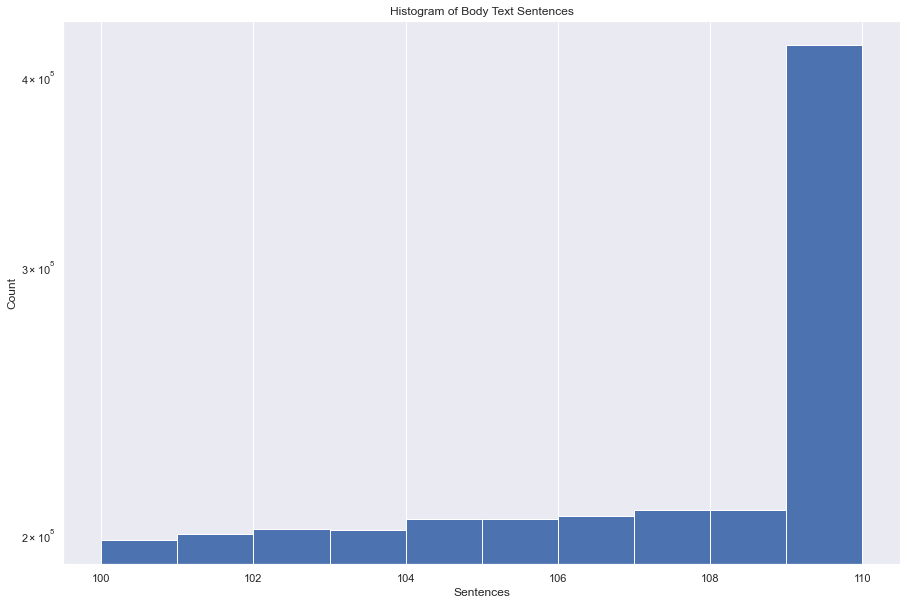

In [147]:
# Histogram plot to determine the optimal character length of sentences
sns.set(rc = {'figure.figsize':(15,10)})

Article_Data_Cord_File_DF_Body_Text_Length.hist(column='Body_Text_Sentences_Length',log=True,bins=10,range=(100,110))
plt.xlabel('Sentences')
plt.ylabel('Count')
plt.title('Histogram of Body Text Sentences')
plt.show()

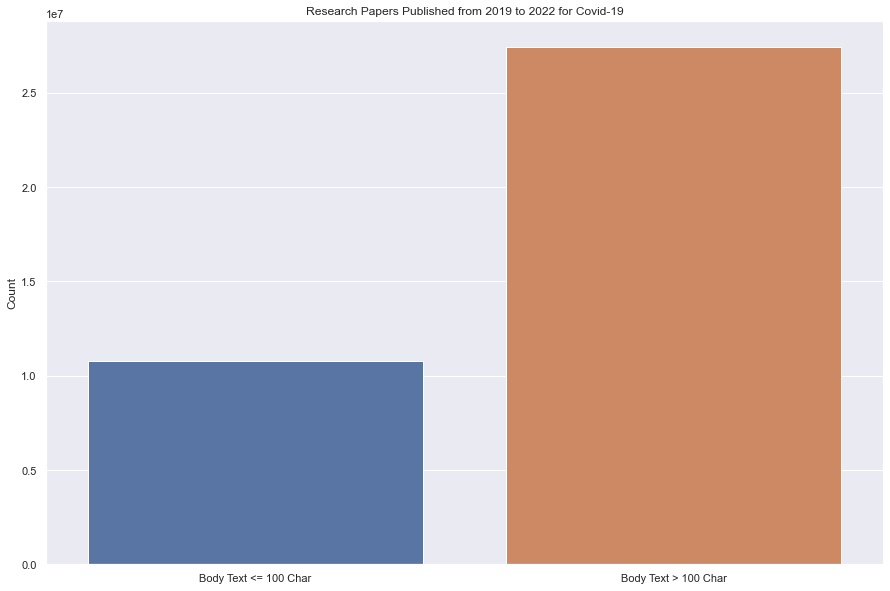

In [148]:
# Plotting Research Papers with Body Text Characters less than 100 and greater than 100
sns.set(rc = {'figure.figsize':(15,10)})

Cord_Meta_Data_ax = sns.barplot(x = ['Body Text <= 100 Char', 'Body Text > 100 Char'], y = [Article_Data_Cord_File_DF_Body_Text_Length.loc[Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] <= 100,'Body_Text_Sentences_Length'].shape[0], Article_Data_Cord_File_DF_Body_Text_Length.loc[Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] > 100,'Body_Text_Sentences_Length'].shape[0]],log=False)
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

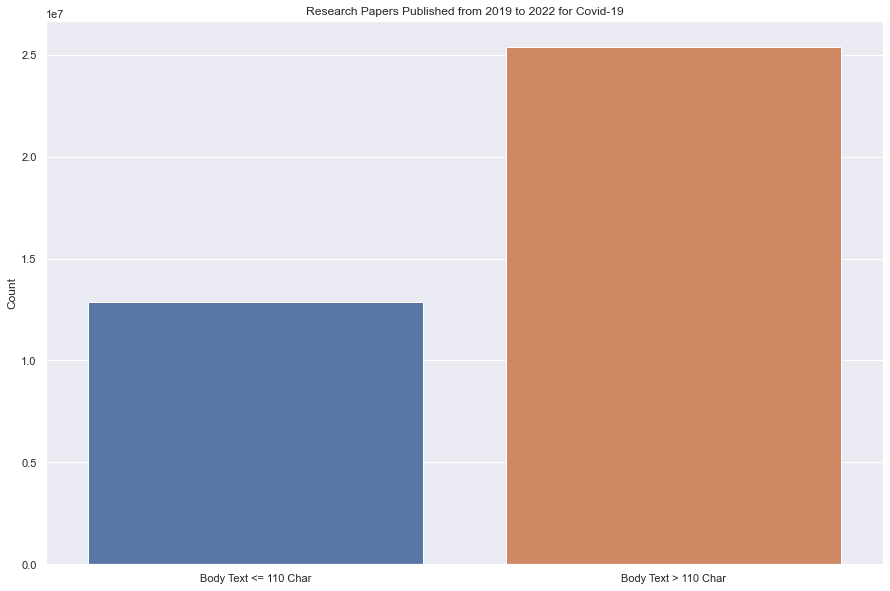

In [149]:
# Plotting Research Papers with Body Text Characters less than 110 and greater than 110
sns.set(rc = {'figure.figsize':(15,10)})

Cord_Meta_Data_ax = sns.barplot(x = ['Body Text <= 110 Char', 'Body Text > 110 Char'], y = [Article_Data_Cord_File_DF_Body_Text_Length.loc[Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] <= 110,'Body_Text_Sentences_Length'].shape[0], Article_Data_Cord_File_DF_Body_Text_Length.loc[Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] > 110,'Body_Text_Sentences_Length'].shape[0]],log=False)
Cord_Meta_Data_ax.set(xlabel='', ylabel='Count', title='Research Papers Published from 2019 to 2022 for Covid-19')
plt.show()

In [150]:
# Keeping Body Text sentences with characters between 100 and 110
Article_Data_Cord_File_DF_Body_Text = Article_Data_Cord_File_DF_Body_Text.loc[(Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] > 100)&(Article_Data_Cord_File_DF_Body_Text_Length['Body_Text_Sentences_Length'] <= 110),:].reset_index(drop=True)

### Keeping Only Common Ids Between Abstract and Body Text

In [151]:
# Finding Unique Ids in Abstract and Body Text
Article_Data_Cord_File_List_Abstract_Id = Article_Data_Cord_File_DF_Abstract['Doc_Id_Meta_Parse'].unique()
Article_Data_Cord_File_List_Body_Text_Id = Article_Data_Cord_File_DF_Body_Text['Doc_Id_Meta_Parse'].unique()

In [152]:
# Common Ids Between Abstract and Body Text
Article_Data_Cord_File_List_Abstract_Body_Text = np.intersect1d(Article_Data_Cord_File_List_Abstract_Id, Article_Data_Cord_File_List_Body_Text_Id)

In [153]:
Article_Data_Cord_File_List_Abstract_Body_Text.shape

(84266,)

In [154]:
# Filtering Abstract and Body Text based on Common Ids Between Abstract and Body Text
Article_Data_Cord_File_DF_Abstract = Article_Data_Cord_File_DF_Abstract.loc[Article_Data_Cord_File_DF_Abstract['Doc_Id_Meta_Parse'].isin(list(Article_Data_Cord_File_List_Abstract_Body_Text)),:].reset_index(drop=True)
Article_Data_Cord_File_DF_Body_Text = Article_Data_Cord_File_DF_Body_Text.loc[Article_Data_Cord_File_DF_Body_Text['Doc_Id_Meta_Parse'].isin(list(Article_Data_Cord_File_List_Abstract_Body_Text)),:].reset_index(drop=True)

### Breaking the Sentences into Token (Using Torchtext) (Will be done in Part 2 of this File)

In [155]:
import torch
tokenizer = get_tokenizer('spacy', language='en_core_web_trf')

In [156]:
Article_Data_Cord_File_DF_Abstract.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\article_data_cord_19_file_df_abstract.pkl")

In [157]:
del Article_Data_Cord_File_DF_Abstract

In [158]:
import gc
gc.collect()
print('',end='')

In [159]:
Article_Data_Cord_File_DF_Body_Text.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\article_data_cord_19_file_df_body_text.pkl")

In [160]:
del Article_Data_Cord_File_DF_Body_Text

In [161]:
import gc
gc.collect()
print('',end='')

### Loading Cord Word Embeddings (Document Embeddings)

In [162]:
Cord_Docu_Embeddings_Df = pd.read_csv(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\cord_19_embeddings_2022-06-02.csv", header=None)

### Filtering Cord-19 Document Embeddings According to Meta Data

In [163]:
Cord_Docu_Embeddings_Df = Cord_Docu_Embeddings_Df.loc[Cord_Docu_Embeddings_Df[0].isin(Article_Data_Cord_File_List_Abstract_Body_Text),:]
Cord_Docu_Embeddings_Df.reset_index(drop=True,inplace=True)

### Storing Filtered Embedding to CSV

In [164]:
Cord_Docu_Embeddings_Df.to_csv(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 8\archive\cord_19_embeddings\cord_19_embeddings_filtered.csv", header=False, index=False, sep=' ')

In [165]:
del Cord_Docu_Embeddings_Df

In [166]:
import gc
gc.collect()
print("",end="")